# Text Processing - for TAU Text Mining (for MBA) 24/25

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1. Importing the dataset

Taken from:
https://www.kaggle.com/datasets/maher3id/restaurant-reviewstsv

In [2]:
import pandas as pd

In [3]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

In [4]:
dataset.sample(10)

,Review,Liked
766,One of the few places in Phoenix that I would ...,1
531,This place is two thumbs up....way up.,1
790,When I received my Pita it was huge it did hav...,1
16,Highly recommended.,1
569,I consider this theft.,0
284,I would definitely recommend the wings as well...,1
528,This was my first time and I can't wait until ...,1
739,Never had anything to complain about here.,1
28,Took an hour to get our food only 4 tables in ...,0
77,The sweet potato fries were very good and seas...,1


### Q1: Extract random sentences

Extract a random sample of 10 sentences as a list of strings

In [5]:
sent_sample = list(dataset.sample(10)['Review'].values)

In [6]:
sent_sample

['I do love sushi, but I found Kabuki to be over-priced, over-hip and under-services.',
 'Special thanks to Dylan T. for the recommendation on what to order :) All yummy for my tummy.',
 "They have a plethora of salads and sandwiches, and everything I've tried gets my seal of approval.",
 "Definitely a turn off for me & i doubt I'll be back unless someone else is buying.",
 "this is the worst sushi i have ever eat besides Costco's.",
 "Probably never coming back, and wouldn't recommend it.",
 'The ripped banana was not only ripped, but petrified and tasteless.',
 'The shrimp tender and moist.',
 'Shrimp- When I unwrapped it (I live only 1/2 a mile from Brushfire) it was literally ice cold.',
 "So don't go there if you are looking for good food..."]

## 2. Simple Bag-of-Words

### Q2: Build a BoW-er

Write a function that turns a string sentence into a dict-based BoW representation.

**Hint:** Use https://www.nltk.org/api/nltk.tokenize.word_tokenize.html

In [ ]:
from typing import Dict
from nltk.tokenize import word_tokenize

def bower(sent_str: str) -> Dict[str, int]:
    # Fix me!
    return {}

In [7]:
from typing import Dict
from nltk.tokenize import word_tokenize

def bower(sent_str: str) -> Dict[str, int]:
    bow = {}
    word_list: List[str] = word_tokenize(sent_str)
    for w in word_list:
        bow[w] = bow.get(w, 0) + 1
    return bow

/Users/shaypalachy/.pyenv/versions/py3/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [8]:
bower(sent_sample[0])

{'I': 2,
 'do': 1,
 'love': 1,
 'sushi': 1,
 ',': 2,
 'but': 1,
 'found': 1,
 'Kabuki': 1,
 'to': 1,
 'be': 1,
 'over-priced': 1,
 'over-hip': 1,
 'and': 1,
 'under-services': 1,
 '.': 1}

bower(sent_sample[5])

### Q3: Generate a single BoW-dict representation for your sentence sample

In [9]:
united_dict = {}
for s in sent_sample:
    united_dict.update(bower(s))

### Q4: How many unique words in your sentence sample?

In [10]:
len(united_dict)

105

## 3. BoW-based vectorization

Here is how we can use existing `sklearn` features to get one-hot-encoded vector BoW representations of our sentences.

https://scikit-learn.org/1.5/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 3000, lowercase=False)
X = cv.fit_transform(sent_sample).toarray()

In [12]:
X[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

### Q5: How many unique words in your sentence sample, according to CountVectorizer?

In [13]:
X.shape

(10, 94)

Why is the number (probably) lower?

Because of the way `CountVectorizer` separates strings into tokens; see the documentation for `token_pattern`:

``token_patternstr or None, default=r”(?u)\b\w\w+\b”``

  Regular expression denoting what constitutes a “token”, only used if analyzer == 'word'. The default regexp select tokens of 2 or 
  more alphanumeric characters **(punctuation is completely ignored and always treated as a token separator)**.

## 4. Text Preprocessing / Cleaning 

### Q6: Build a document preprocessing function

Make sure to:
1. Lowercae.
2. Split into tokens.
3. Remove stopwords.
4. Stem the words into stems.

In [14]:
from typing import List

def clean_doc(doc: str) -> List[str]:
    # fix me!
    return doc

In [15]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [16]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shaypalachy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# NOTE: This is a naive, "old world" implementation of text cleaning basics;
# this is usualy not how we do this today, at least for ML.
# More commons methods are:
# 1. spacy
# https://spacy.io/usage/processing-pipelines
# 2. torchtext, when working with PyTorch:
# https://pytorch.org/text/stable/index.html

PS = PorterStemmer()
STPWRDS = stopwords.words('english')
STPWRDS.remove('not')
STPWRDS = set(STPWRDS)

def clean_doc(doc: str) -> List[str]:
    # Optional phase 0: Clean stop characters
    # (we don't do this a lot in modern NLP, but this can be useful for text mining)
    # here's how to remove all non-English-letters characters
    clean = re.sub('[^a-zA-Z]', ' ', doc)
    # Phase 1: Lowercase
    doc = clean.lower()
    # Phase 2: Split into tokens
    doc = doc.split()
    # Phase 3: Remove Stopwords
    doc = [w for w in doc if not w in STPWRDS]
    # Phase 4: Stem into stems
    doc = [PS.stem(w) for w in doc]
    # fix me!
    return doc

In [18]:
clean_samp = [clean_doc(doc) for doc in sent_sample]

In [19]:
clean_samp[0:3]

[['love', 'sushi', 'found', 'kabuki', 'price', 'hip', 'servic'],
 ['special', 'thank', 'dylan', 'recommend', 'order', 'yummi', 'tummi'],
 ['plethora', 'salad', 'sandwich', 'everyth', 'tri', 'get', 'seal', 'approv']]

## 5. Text Preprocessing Pipeline

### Q7: Build a coprpus preprocessing function

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

In [21]:
def dataset_to_X(df: pd.DataFrame) -> pd.DataFrame:
    # Fix me!
    return df

In [22]:
def dataset_to_X(df: pd.DataFrame) -> pd.DataFrame:
    corpus = list(df['Review'].values)
    count_vec = CountVectorizer(max_features = 3000, lowercase=True, analyzer=clean_doc)
    X = count_vec.fit_transform(corpus).toarray()
    return pd.DataFrame(data=X, columns=count_vec.get_feature_names_out())

In [23]:
dataset_to_X(dataset)

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 6. Text Preprocessing Pipeline w/ TFIDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
def dataset_to_tfidf_X(df: pd.DataFrame) -> pd.DataFrame:
    # Fix me!
    return df

In [26]:
def dataset_to_tfidf_X(df: pd.DataFrame) -> pd.DataFrame:
    corpus = list(df['Review'].values)
    count_vec = TfidfVectorizer(max_features = 3000, lowercase=True, analyzer=clean_doc)
    X = count_vec.fit_transform(corpus).toarray()
    return pd.DataFrame(data=X, columns=count_vec.get_feature_names_out())

In [27]:
tfidf_X = dataset_to_tfidf_X(dataset)
tfidf_X

,absolut,absolutley,accid,accommod,accomod,accordingli,account,ach,acknowledg,across,...,year,yellow,yellowtail,yelper,yet,yucki,yukon,yum,yummi,zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
def present_active_indices(X: pd.DataFrame, index: int) -> pd.Series:
    """Returns a sub-series of non-zero components of the document vector at the given index."""
    return X.iloc[index][X.iloc[index] != 0]

In [29]:
present_active_indices(tfidf_X, 0)

love     0.516113
place    0.378913
wow      0.768148
Name: 0, dtype: float64

In [30]:
present_active_indices(tfidf_X, 3)

bank         0.373448
holiday      0.373448
late         0.352463
love         0.226814
may          0.316589
recommend    0.256931
rick         0.373448
steve        0.373448
stop         0.316589
Name: 3, dtype: float64

## 7. Use our pipeline for some simple text classification

We will use the `"Liked"` column (which is either 0 or 1) as our label, and see if we can learn to predict it.

### Setup our X and y

In [31]:
y = dataset.iloc[:, -1].values

In [32]:
y.shape

(1000,)

### Split the dataset into a training and test set

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tfidf_X, y, test_size = 0.20, random_state = 0)

### Fit a Gaussian Naive Bayes classifier

In [34]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

### Predict on the test set

In [35]:
import numpy as np

In [36]:
y_pred = classifier.predict(X_test)
# print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Evaluate

In [37]:
# taken from https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Note that due to returning the created figure object, when this funciton is called in a
    notebook the figure willl be printed twice. To prevent this, either append ; to your
    function call, or modify the function by commenting out the return expression.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # Note that due to returning the created figure object, when this funciton is called in a notebook
    # the figure willl be printed twice. To prevent this, either append ; to your function call, or
    # modify the function by commenting out this return expression.
    return fig

In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

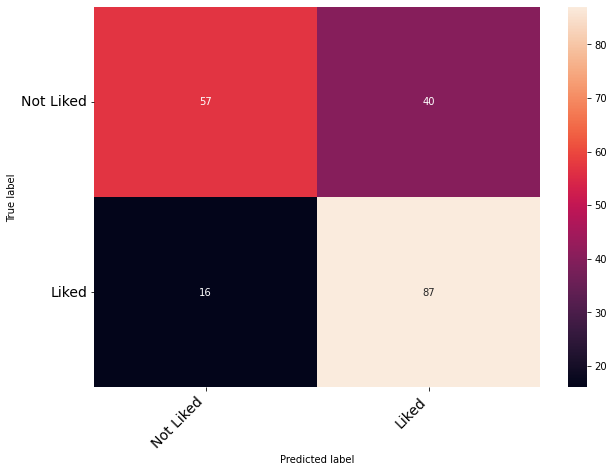

In [39]:
print_confusion_matrix(cm, ['Not Liked', 'Liked']);

In [40]:
acc = accuracy_score(y_test, y_pred)
acc

0.72

In [41]:
print(f"We achieve an accuracy score of {100*acc:.2f}%.")

We achieve an accuracy score of 72.00%.
